# Contents

# 1. Author
# 2. Problem formulation
# 3. Machine Learning Pipeline
# 4. Transformation stage
# 5. Modeling
# 6. Methodology
# 7. Dataset
## 7.1 Data Loading
###  7.1.1 Label Extraction
####    7.1.1.1 Defining Participant
####    7.1.1.2 Defining Non-Standard
####    7.1.1.3 Re-labelling Participants
### 7.1.2 Balancing
###  7.1.3 Sampling
##  7.2 Feature Extraction of Sample
###  7.2.1 Dimensionality Reduction/ Pruning of Features
###  7.2.2 Selected Feature Extraction
####    7.2.2.1 Visualisation of Sample Features
####    7.2.2.2 Standard Scaling and Train/Validation Split
# 8 Results
##  8.1 Validation
###    8.1.1 SVM
###    8.1.2 KNN
###    8.1.3 Logistic Classifier
###    8.1.4 Random Forest
###    8.1.5 Naive Bayes
###    8.1.6 Model Comparison
##  8.2 Training
###   8.2.1 Whole Dataset Preparation
###   8.2.2 Model Training
# 9 Conclusions


# 1 Author

**Student Name**:  Peter Stasiw

**Student ID**:  210864061



# 2 Problem formulation
The instructions to create the dataset of audio was very clear. Every audio file should have been named in a standard form. Nonetheless, some contributors failed to do so.

The trial of this project is to see if it is possible to identify these individuals from the features of their audio files. For example, I would expect a contributor who named the file incorrectly to also have errors in producing various songs. Hence, their audio files will be very different. This original idea could be useful for detecting individuals who cannot follow instructions. For example, if many people were auditioning for a talent show and you had to sort contestants, you could sort them by if they followed instructions or not. More broadly, many banks use voice as security and ask you to speak a specific phrase. A model like this could detect if the phrase is being vocalised incorrectly.

# 3 Machine Learning Pipeline

1. Loading and label-extraction of data
2. Organisation into a dataframe.
3. Re-labeling some participant files.
4. Dataframe balancing by label undersampling.
5. Feature extraction from dataframe sample.
6. Feature selection based on correlation matrix.
7. Selected feature extraction from dataframe sample
8. Feature dataframe split into training and validation subsets.
9. Standard scaling of subsets.
10. Model validation on standardised sample.
11. Feature extraction of unsampled dataframe.
12. Unsampled feature dataframe split into train and validation subsets.
13. Standard scalaing of subsets.
14. Best model from the validation stage is trained on the unsampled standardised feature train subset and tested on the validation subset.

# 4 Transformation stage

The following features will be extracted prior to selection:
* Power
* Zero Crossing Rate
* Onset Strength
* Tempogram
* Spectral Flatness
* Chroma CENS
* Spectral Centroid
* Spectral Contrast
* Spectral Roll-off
* Tonnetz
* MFCC (Mel-Frequency Cepstral Coefficients)
* Spectral Bandwidth

As these features output an array per audio file, the standard deviation of each array will be taken to form a dataframe. Standard deviation is a good measure as it indicates the spread of the outputted values.

## Summary of each feature
- Power is used to measure the variation in amplitude over the audio files.
- Zero-crossing rate counts the number of times the amplitude crosses 0.
- Onset strength detects new 'onsets' which is effectively a new musical note in the audio.
- Tempogram outputs the changes of tempo of the audio.
- Chroma CENS takes into account harmonic content of the audio.
- Tonnetz measures harmonic pitches of the fifth and major and minor thirds.
- MFCC can enable classification of phonemes (the smallest unit of sound in a word.

### Spectral Features
- Spectral bandwidth is the range of frequencies in given audio.
- Spectral contrast measures the energy of frequency.
- Spectral roll-off measures the strength of the positive skewed-ness of power.
- Spectral centroid is a measure how 'bright' the audio is. For example, if it is predominantly high or low frequency.
- Spectral flatness measures the tonality in comparison to noisiness of the audio.

The values of all features are then standardised via standard scaling to avoid issues of scale.

# 5 Modelling
Various models will be validated. These models have different methods for creating boundaries which will allow differentiation of performance between them.
Gridsearch will be used for hyperparameters of the models to find the most optimal margin for the best accuracy. The standard 5-fold cross-validation is employed in the gridsearch to find these hyperparameters.

For SVM, the value hyperparameter C is sought, which dictates how soft the margin is. For example, a value of 10 produces a harder margin than 1.

For KNN, the value hyperparameter n-nearest neighbours is sought, which dictates how many neighbours the model takes into account to produce the classification. For example, a value of 1 will only take into account 1 nearest neighbour, and this will overfit, hence this value is excluded from the gridsearch list. On the contrary, a n-nearest neighbour of 100, will compare 100 neighbours and is likely to be inaccurate in a small dataset.

For the logistic classifier, the hyperparameter is the type of solver the model uses, which are very complex implementations and gridsearch will choose the one with highest accuracy.

For random forest, the best quality metric for splitting is chosen whereas naive bayes has all hyperparameters set to default.

# 6 Methodology

The sample from the dataset will be split primarily into train and validation sets before modelling. This allows to see if overfitting or inaccuracy is an issue in any model.

For all models, both validation accuracy and a confusion matrix will be used to gauge the success. An accuracy of 0.5 is no better than a coin toss, with 1 being perfect. However a train accuracy of 1 is considered overfitting, hence a validation accuracy will be more important.

# 7 Dataset

The raw data are in wav files, bundled together by song in zip files in 2 parts. Both parts will be used to maximise the numbers of the minority class. Once unzipped, only wav files will be used for further processing.

The next step is to categorise non-standard and standard-named files. Every participant was expected to record 4 files (2 hums and 2 whistles) of 8 different songs. Thus, it is expected that every participant has recorded 32 audio files. However, this does vary. Nonetheless, if a participant has named at least one file incorrectly, the dataframe is updated to label all their songs as non-standard. This serves two purposes: naming a song wrong once indicates that the participant has the capacity to make an error, and as a result this increases the number of the minority (non-standard) label.

Furthermore, as non-standard are likely to be the minority class, going forward with an unbalanced dataset would render accuracy values useless. Hence, the dataset is rebalanced if required. Undersampling of the majority class is preferred because it will prevent samples of the train, test or validation datasets from having the same values (as what would happen in an oversampled dataset).

Before running the next steps, the balanced dataset will be sampled for the validation set, after validation the full dataset will train and test the best performing model.



## 7.1 Data Loading

In [1]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile
from sklearn.model_selection import GridSearchCV

import IPython.display as ipd
from tqdm import tqdm
import librosa
from sklearn import svm
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data/'
os.listdir(path)

Mounted at /content/drive


['Potter_1', 'StarWars_1', 'Combined']

In [ ]:
def unzip(directory_to_extract_to, zip_path):
  zip_name_ = zip_path.replace("/content/drive/MyDrive/Data/", "")
  zip_name = zip_name_.replace(".zip", "")
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
  sample_path = zip_path.replace(".zip", '') + "/*.wav"
  files = glob.glob(sample_path)
  return files

In [ ]:
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Frozen_1.zip")
os.remove("/content/drive/MyDrive/Data/Frozen_1.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Hakuna_1.zip")
os.remove("/content/drive/MyDrive/Data/Hakuna_1.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Mamma_1.zip")
os.remove("/content/drive/MyDrive/Data/Mamma_1.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Panther_1.zip")
os.remove("/content/drive/MyDrive/Data/Panther_1.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Potter_1.zip")
os.remove("/content/drive/MyDrive/Data/Potter_1.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Rain_1.zip")
os.remove("/content/drive/MyDrive/Data/Rain_1.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Showman_1.zip")
os.remove("/content/drive/MyDrive/Data/Showman_1.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/StarWars_1.zip")
os.remove("/content/drive/MyDrive/Data/StarWars_1.zip")

unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Frozen_2.zip")
os.remove("/content/drive/MyDrive/Data/Frozen_2.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Hakuna_2.zip")
os.remove("/content/drive/MyDrive/Data/Hakuna_2.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Mamma_2.zip")
os.remove("/content/drive/MyDrive/Data/Mamma_2.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Panther_2.zip")
os.remove("/content/drive/MyDrive/Data/Panther_2.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Potter_2.zip")
os.remove("/content/drive/MyDrive/Data/Potter_2.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Rain_2.zip")
os.remove("/content/drive/MyDrive/Data/Rain_2.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/Showman_2.zip")
os.remove("/content/drive/MyDrive/Data/Showman_2.zip")
unzip("/content/drive/MyDrive/Data/Combined", "/content/drive/MyDrive/Data/StarWars_2.zip")
os.remove("/content/drive/MyDrive/Data/StarWars_2.zip")

In [2]:
all = glob.glob("/content/drive/MyDrive/Data/Combined/*.wav")

### 7.1.1 Label Extraction


#### 7.1.1.1 Defining Participant

In [3]:
ID_table = []

for file in all:
  path = file
  file_name = file.split('/')[-1]
  participant_ID = file_name.split('_')[0]
  ID_table.append([path, participant_ID])

ID_df = pd.DataFrame(ID_table, columns = ['path', 'participant_ID'])
participants = list(ID_df.participant_ID.unique())
len(participants)

209

All IDs are named as per the standard.

#### 7.1.1.2 Defining Non-Standard

In [4]:
wrong_files = []
right_files = []

for file in all:
  file_name = file.split('/')[-1]
  path = file
  participant_ID = file_name.split('_')[0]
  if not re.match("S[0-9]+_(hum|whistle)_[0-4]_(StarWars|Potter|Showman|Frozen|Mamma|Rain|Hakuna|Panther)\.wav", file_name, re.IGNORECASE):
    Standard = 'No'
    wrong_files.append([path, participant_ID, Standard])
  else:
    Standard = 'Yes'
    right_files.append([path, participant_ID, Standard])

wrong = pd.DataFrame(wrong_files, columns = ['path', 'participant_ID', 'Standard'])
right = pd.DataFrame(right_files, columns = ['path', 'participant_ID', 'Standard'])
combined = right.append(wrong, ignore_index=True)
combined

,path,participant_ID,Standard
0,/content/drive/MyDrive/Data/Combined/S132_hum_...,S132,Yes
1,/content/drive/MyDrive/Data/Combined/S132_whis...,S132,Yes
2,/content/drive/MyDrive/Data/Combined/S133_whis...,S133,Yes
3,/content/drive/MyDrive/Data/Combined/S133_whis...,S133,Yes
4,/content/drive/MyDrive/Data/Combined/S135_hum_...,S135,Yes
...,...,...,...
3289,/content/drive/MyDrive/Data/Combined/S60_whist...,S60,No
3290,/content/drive/MyDrive/Data/Combined/S61_hum_2...,S61,No
3291,/content/drive/MyDrive/Data/Combined/S61_whist...,S61,No
3292,/content/drive/MyDrive/Data/Combined/S63_hum_3...,S63,No


#### 7.1.1.3 Re-labeling Participants
If a participant has made at least one error, all of their files will be re-labeled as non-standard.

In [5]:
fools = list(wrong.participant_ID.unique())

master_index = []

for fool in fools:
  indexes = combined.loc[(combined.participant_ID == fool)].index
  index = list(indexes)
  master_index.append(index)

flat_index = []

for loc in range(len(master_index)):
  for subloc in range(len(master_index[loc])):
    flat_index.append(master_index[loc][subloc])

for index in flat_index:
  combined.loc[index, 'Standard'] = 'No'

In [6]:
count_no = len(combined.loc[(combined.Standard == 'No')])
count_yes = len(combined.loc[(combined.Standard == 'Yes')])

print("How much the dataset is imbalanced by:")
print("Non-Standard: " + str(count_no))
print("Standard: " + str(count_yes))

How much the dataset is imbalanced by:
Non-Standard: 784
Standard: 2510


As we can see, the dataset is very unbalanced. Balancing is necessary.

### 7.1.2 Balancing

In [7]:
from sklearn.utils import resample

majoritydf = combined[combined.Standard == 'Yes']
minoritydf = combined[combined.Standard == 'No']

# Downsample majority class
downsampled_majority = resample(majoritydf, 
                                 replace=False,     # sample with replacement
                                 n_samples=count_no,    # to match minority class
                                 random_state=4) # reproducible results

balanced = pd.concat([minoritydf, downsampled_majority])

count_false = len(balanced.loc[(balanced.Standard == 'No')])
count_true = len(balanced.loc[(balanced.Standard == 'Yes')])

print("Balanced dataset:")
print("Non-Standard: " + str(count_false))
print("Standard: " + str(count_true))

Balanced dataset:
Non-Standard: 784
Standard: 784


### 7.1.3 Sampling

In [8]:
sample = balanced.sample(frac=0.2, random_state=2).reset_index(drop=True)
sample

,path,participant_ID,Standard
0,/content/drive/MyDrive/Data/Combined/S65_hum_4...,S65,Yes
1,/content/drive/MyDrive/Data/Combined/S65_hum_4...,S65,Yes
2,/content/drive/MyDrive/Data/Combined/S154_hum_...,S154,No
3,/content/drive/MyDrive/Data/Combined/S128_hum_...,S128,Yes
4,/content/drive/MyDrive/Data/Combined/S214_hum_...,S214,No
...,...,...,...
309,/content/drive/MyDrive/Data/Combined/S221_whis...,S221,No
310,/content/drive/MyDrive/Data/Combined/S12_hum_4...,S12,No
311,/content/drive/MyDrive/Data/Combined/S97_hum_4...,S97,Yes
312,/content/drive/MyDrive/Data/Combined/S35_hum_4...,S35,No


## 7.2 Feature Extraction of Sample

In [9]:
def getXyall(files,labels_file, scale_audio=False, onlySingleDigit=False):
  import time   #work out time remaining
  start = time.time()
  est = 0

  X,y =[],[]
  row = 0
  n = len(files)
  thres = n//25   #for time and print statement
  while row < n:
    file = files.loc[row, 'path']
    #print(file) # to see progress
    yi = labels_file.loc[row]['Standard']=='Yes'
    #print(yi)


    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    

    ## Array extraction
    zero_rate = librosa.feature.zero_crossing_rate(x)
    oenv = librosa.onset.onset_strength(y=x, sr=fs)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=fs) 
    flat = librosa.feature.spectral_flatness(x)
    chroma = librosa.feature.chroma_cens(x, sr=fs)
    cent = librosa.feature.spectral_centroid(x, sr=fs)
    cont = librosa.feature.spectral_contrast(x, sr=fs)
    roll = librosa.feature.spectral_rolloff(x, sr=fs)
    ton = librosa.feature.tonnetz(x, sr=fs)
    mfcc = librosa.feature.mfcc(x, sr=fs)
    band = librosa.feature.spectral_bandwidth(x, sr=fs)
   

    ## Array simplification
    power = np.sum(x**2)/len(x)
    zero_rate_std = np.std(zero_rate)
    tempo_std = np.std(tempogram)
    flat_std = np.std(flat)
    chroma_std = np.std(chroma)
    cent_std = np.std(cent)
    cont_std = np.std(cont)
    roll_std = np.std(roll)
    ton_std = np.std(ton)
    mfcc_std = np.std(mfcc)
    band_std = np.std(band)

    xi = [power, zero_rate_std, tempo_std, flat_std, chroma_std, cent_std, cont_std, roll_std, ton_std, mfcc_std, band_std]
    X.append(xi)
    y.append(yi)


    ## Works out estimated time left (only prints 25 times)
    if row == 0:
      pass
    elif row % thres == 0:
      end = time.time()
      est_before = est
      est = (end - start)*(n-row)/row
      print(str(row*100//n) + '%')
      print("Estimated time left: " + str(round(est)) + " seconds")
    else:
      pass
    row +=1
  print("Done!")
  return np.array(X),np.array(y)

In [10]:
X,y = getXyall(sample, labels_file=sample, scale_audio=True, onlySingleDigit=True)

3%
Estimated time left: 1096 seconds
7%
Estimated time left: 1008 seconds
11%
Estimated time left: 960 seconds
15%
Estimated time left: 925 seconds
19%
Estimated time left: 902 seconds
22%
Estimated time left: 838 seconds
26%
Estimated time left: 791 seconds
30%
Estimated time left: 749 seconds
34%
Estimated time left: 704 seconds
38%
Estimated time left: 666 seconds
42%
Estimated time left: 624 seconds
45%
Estimated time left: 584 seconds
49%
Estimated time left: 541 seconds
53%
Estimated time left: 502 seconds
57%
Estimated time left: 461 seconds
61%
Estimated time left: 419 seconds
64%
Estimated time left: 377 seconds
68%
Estimated time left: 335 seconds
72%
Estimated time left: 295 seconds
76%
Estimated time left: 254 seconds
80%
Estimated time left: 212 seconds
84%
Estimated time left: 172 seconds
87%
Estimated time left: 131 seconds
91%
Estimated time left: 89 seconds
95%
Estimated time left: 48 seconds
99%
Estimated time left: 7 seconds
Done!


In [12]:
cols = ['power', 'zero_rate_std', 'tempo_std', 'flat_std', 'chroma_std', 'cent_std', 'cont_std', 'roll_std', 'ton_std', 'mfcc_std', 'band_std']

X_df = pd.DataFrame(X, columns = cols)

X_df

,power,zero_rate_std,tempo_std,flat_std,chroma_std,cent_std,cont_std,roll_std,ton_std,mfcc_std,band_std
0,0.140093,0.007610,0.302145,0.001263,0.243169,575.569863,9.976160,1717.025342,0.305842,73.513817,894.173488
1,0.113776,0.014786,0.261805,0.002109,0.228309,829.367090,9.414336,2205.658693,0.297286,82.550682,1306.375512
2,0.006435,0.053165,0.263944,0.017428,0.192464,1473.907903,6.223871,3483.348107,0.148797,87.184715,1460.416796
3,0.045809,0.013725,0.249320,0.003077,0.206241,1270.782898,5.247952,3819.537899,0.154803,88.757759,1559.222829
4,0.033290,0.150004,0.155316,0.042004,0.207822,3866.331096,6.724114,7710.929187,0.209017,93.741333,2675.975609
...,...,...,...,...,...,...,...,...,...,...,...
309,0.027042,0.058379,0.197484,0.025546,0.190911,2554.260109,7.834297,6944.918625,0.209366,91.185760,2601.612770
310,0.006955,0.056454,0.254472,0.034856,0.225170,1948.727892,4.915341,4568.566810,0.193258,72.401161,895.324861
311,0.020166,0.197927,0.108427,0.054139,0.197959,4474.840037,7.796255,8537.793396,0.182302,99.652733,2916.155117
312,0.032536,0.005959,0.181315,0.000347,0.202579,363.244924,6.230548,933.400579,0.166124,75.768982,863.348011


### 7.2.1 Dimensionality Reduction/ Pruning of Features

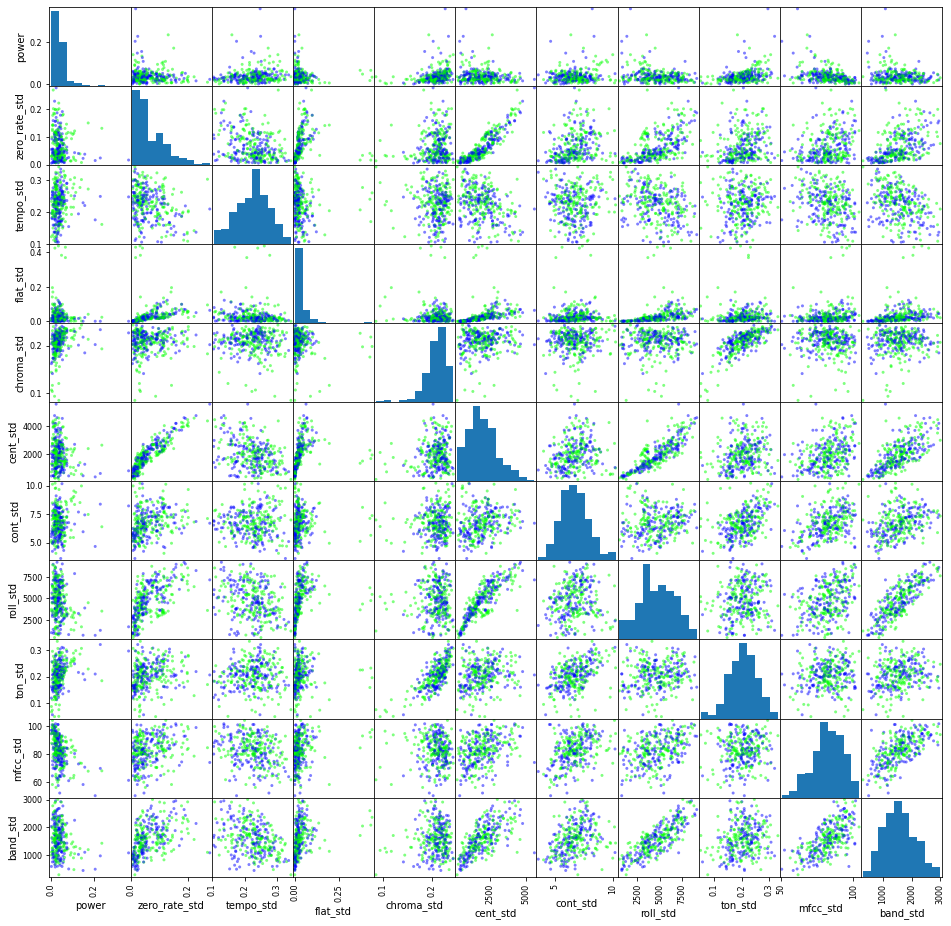

In [13]:
_a = pd.plotting.scatter_matrix(X_df, figsize=(16,16), c=y,cmap='brg')

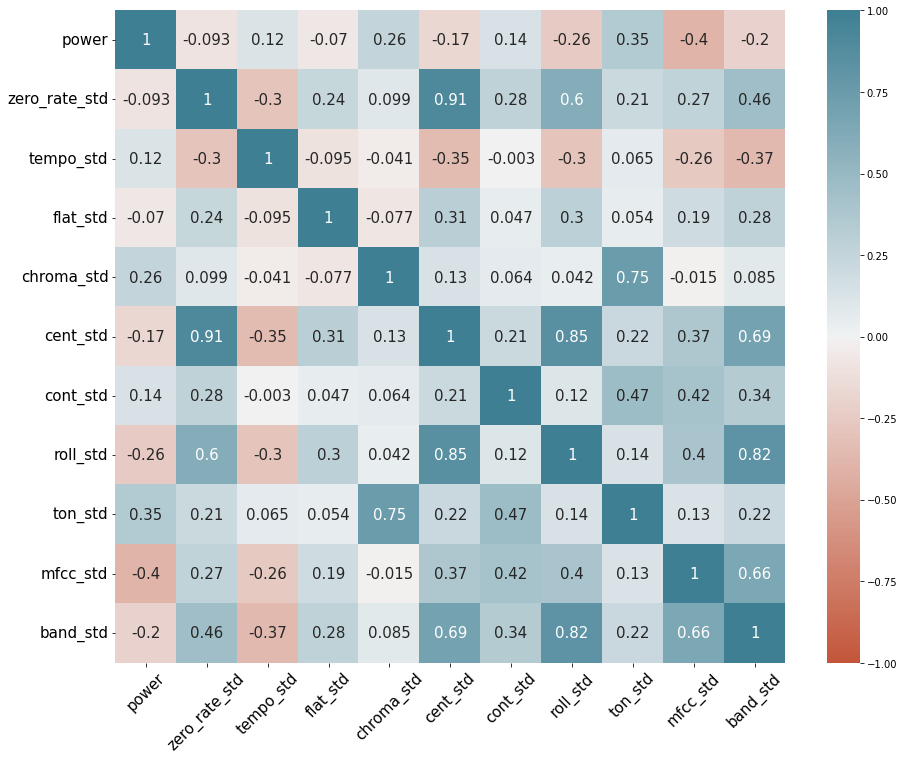

In [14]:
import seaborn as sns
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(X_df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})

_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

From the correlation scatter matrix, it can be seen that there is no good separation with any features. 
A correlation between two features will enable selection of one of the features. This reduces computational cost in further processing. 

For dimensionality reduction, I will discard features that are correlated with others (roughly a correlation score of more than 0.5).

The following will be kept:
* Spectral bandwidth - 'band' (correlated with 'cent', 'roll' and 'MFCC')
* Tonnetz - 'ton' (correlated with 'chroma')
* Spectral flatness - 'flat'
* Tempogram - 'tempo'
* Zero-crossing rate - 'zero-rate'

### 7.2.2 Selected Feature Extraction

In [17]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  import time
  start = time.time()
  X,y =[],[]
  row = 0
  n = len(files)
  thres = n//25
  est = 0
  while row < n:
    file = files.loc[row, 'path']
    #print(file) # to see progress
    yi = labels_file.loc[row]['Standard']=='Yes'
    #print(yi)


    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    
    zero_rate = librosa.feature.zero_crossing_rate(x) # one computation instead of two for the below mean and std
    oenv = librosa.onset.onset_strength(y=x, sr=fs)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=fs) 
    flat = librosa.feature.spectral_flatness(x)
    #chroma = librosa.feature.chroma_cens(x, sr=fs)
    #cent = librosa.feature.spectral_centroid(x, sr=fs)
    #cont = librosa.feature.spectral_contrast(x, sr=fs)
    #roll = librosa.feature.spectral_rolloff(x, sr=fs)
    ton = librosa.feature.tonnetz(x, sr=fs)
    #mfcc = librosa.feature.mfcc(x, sr=fs)
    band = librosa.feature.spectral_bandwidth(x, sr=fs)
   
    #power = np.sum(x**2)/len(x)
    zero_rate_std = np.std(zero_rate)
    tempo_std = np.std(tempogram)
    flat_std = np.std(flat)
    #chroma_std = np.std(chroma)
    #cent_std = np.std(cent)
    #cont_std = np.std(cont)
    #roll_std = np.std(roll)
    ton_std = np.std(ton)
    #mfcc_std = np.std(mfcc)
    band_std = np.std(band)

    xi = [zero_rate_std, tempo_std, flat_std, ton_std,band_std]
    X.append(xi)
    y.append(yi)
    
    # The below works out percentage and time left
    if row == 0:
      pass
    elif row % thres == 0:
      end = time.time()
      est_before = est
      est = (end - start)*(n-row)/row
      print(str(row*100//n) + '%')
      print("Estimated time left: " + str(round(est)) + " seconds")
    else:
      pass
    row +=1
  print("Done!")
  return np.array(X),np.array(y)

In [18]:
X,y = getXy(sample, labels_file=sample, scale_audio=True, onlySingleDigit=True)

3%
Estimated time left: 413 seconds
7%
Estimated time left: 376 seconds
11%
Estimated time left: 360 seconds
15%
Estimated time left: 348 seconds
19%
Estimated time left: 331 seconds
22%
Estimated time left: 307 seconds
26%
Estimated time left: 293 seconds
30%
Estimated time left: 277 seconds
34%
Estimated time left: 261 seconds
38%
Estimated time left: 249 seconds
42%
Estimated time left: 233 seconds
45%
Estimated time left: 217 seconds
49%
Estimated time left: 201 seconds
53%
Estimated time left: 187 seconds
57%
Estimated time left: 172 seconds
61%
Estimated time left: 156 seconds
64%
Estimated time left: 140 seconds
68%
Estimated time left: 125 seconds
72%
Estimated time left: 109 seconds
76%
Estimated time left: 94 seconds
80%
Estimated time left: 79 seconds
84%
Estimated time left: 64 seconds
87%
Estimated time left: 48 seconds
91%
Estimated time left: 33 seconds
95%
Estimated time left: 18 seconds
99%
Estimated time left: 3 seconds
Done!


In [19]:
cols = ['zero_rate_std', 'tempo_std', 'flat_std', 'ton_std','band_std']

X_df = pd.DataFrame(X, columns = cols)
Y_df = pd.DataFrame(y)

vis = X_df.assign(Standard = Y_df)
vis

,zero_rate_std,tempo_std,flat_std,ton_std,band_std,Standard
0,0.007610,0.302145,0.001263,0.305842,894.173488,True
1,0.014786,0.261805,0.002109,0.297286,1306.375512,True
2,0.053165,0.263944,0.017428,0.148797,1460.416796,False
3,0.013725,0.249320,0.003077,0.154803,1559.222829,True
4,0.150004,0.155316,0.042004,0.209017,2675.975609,False
...,...,...,...,...,...,...
309,0.058379,0.197484,0.025546,0.209366,2601.612770,False
310,0.056454,0.254472,0.034856,0.193258,895.324861,False
311,0.197927,0.108427,0.054139,0.182302,2916.155117,True
312,0.005959,0.181315,0.000347,0.166124,863.348011,False


#### 7.2.2.1 Visualisation of Sample Features

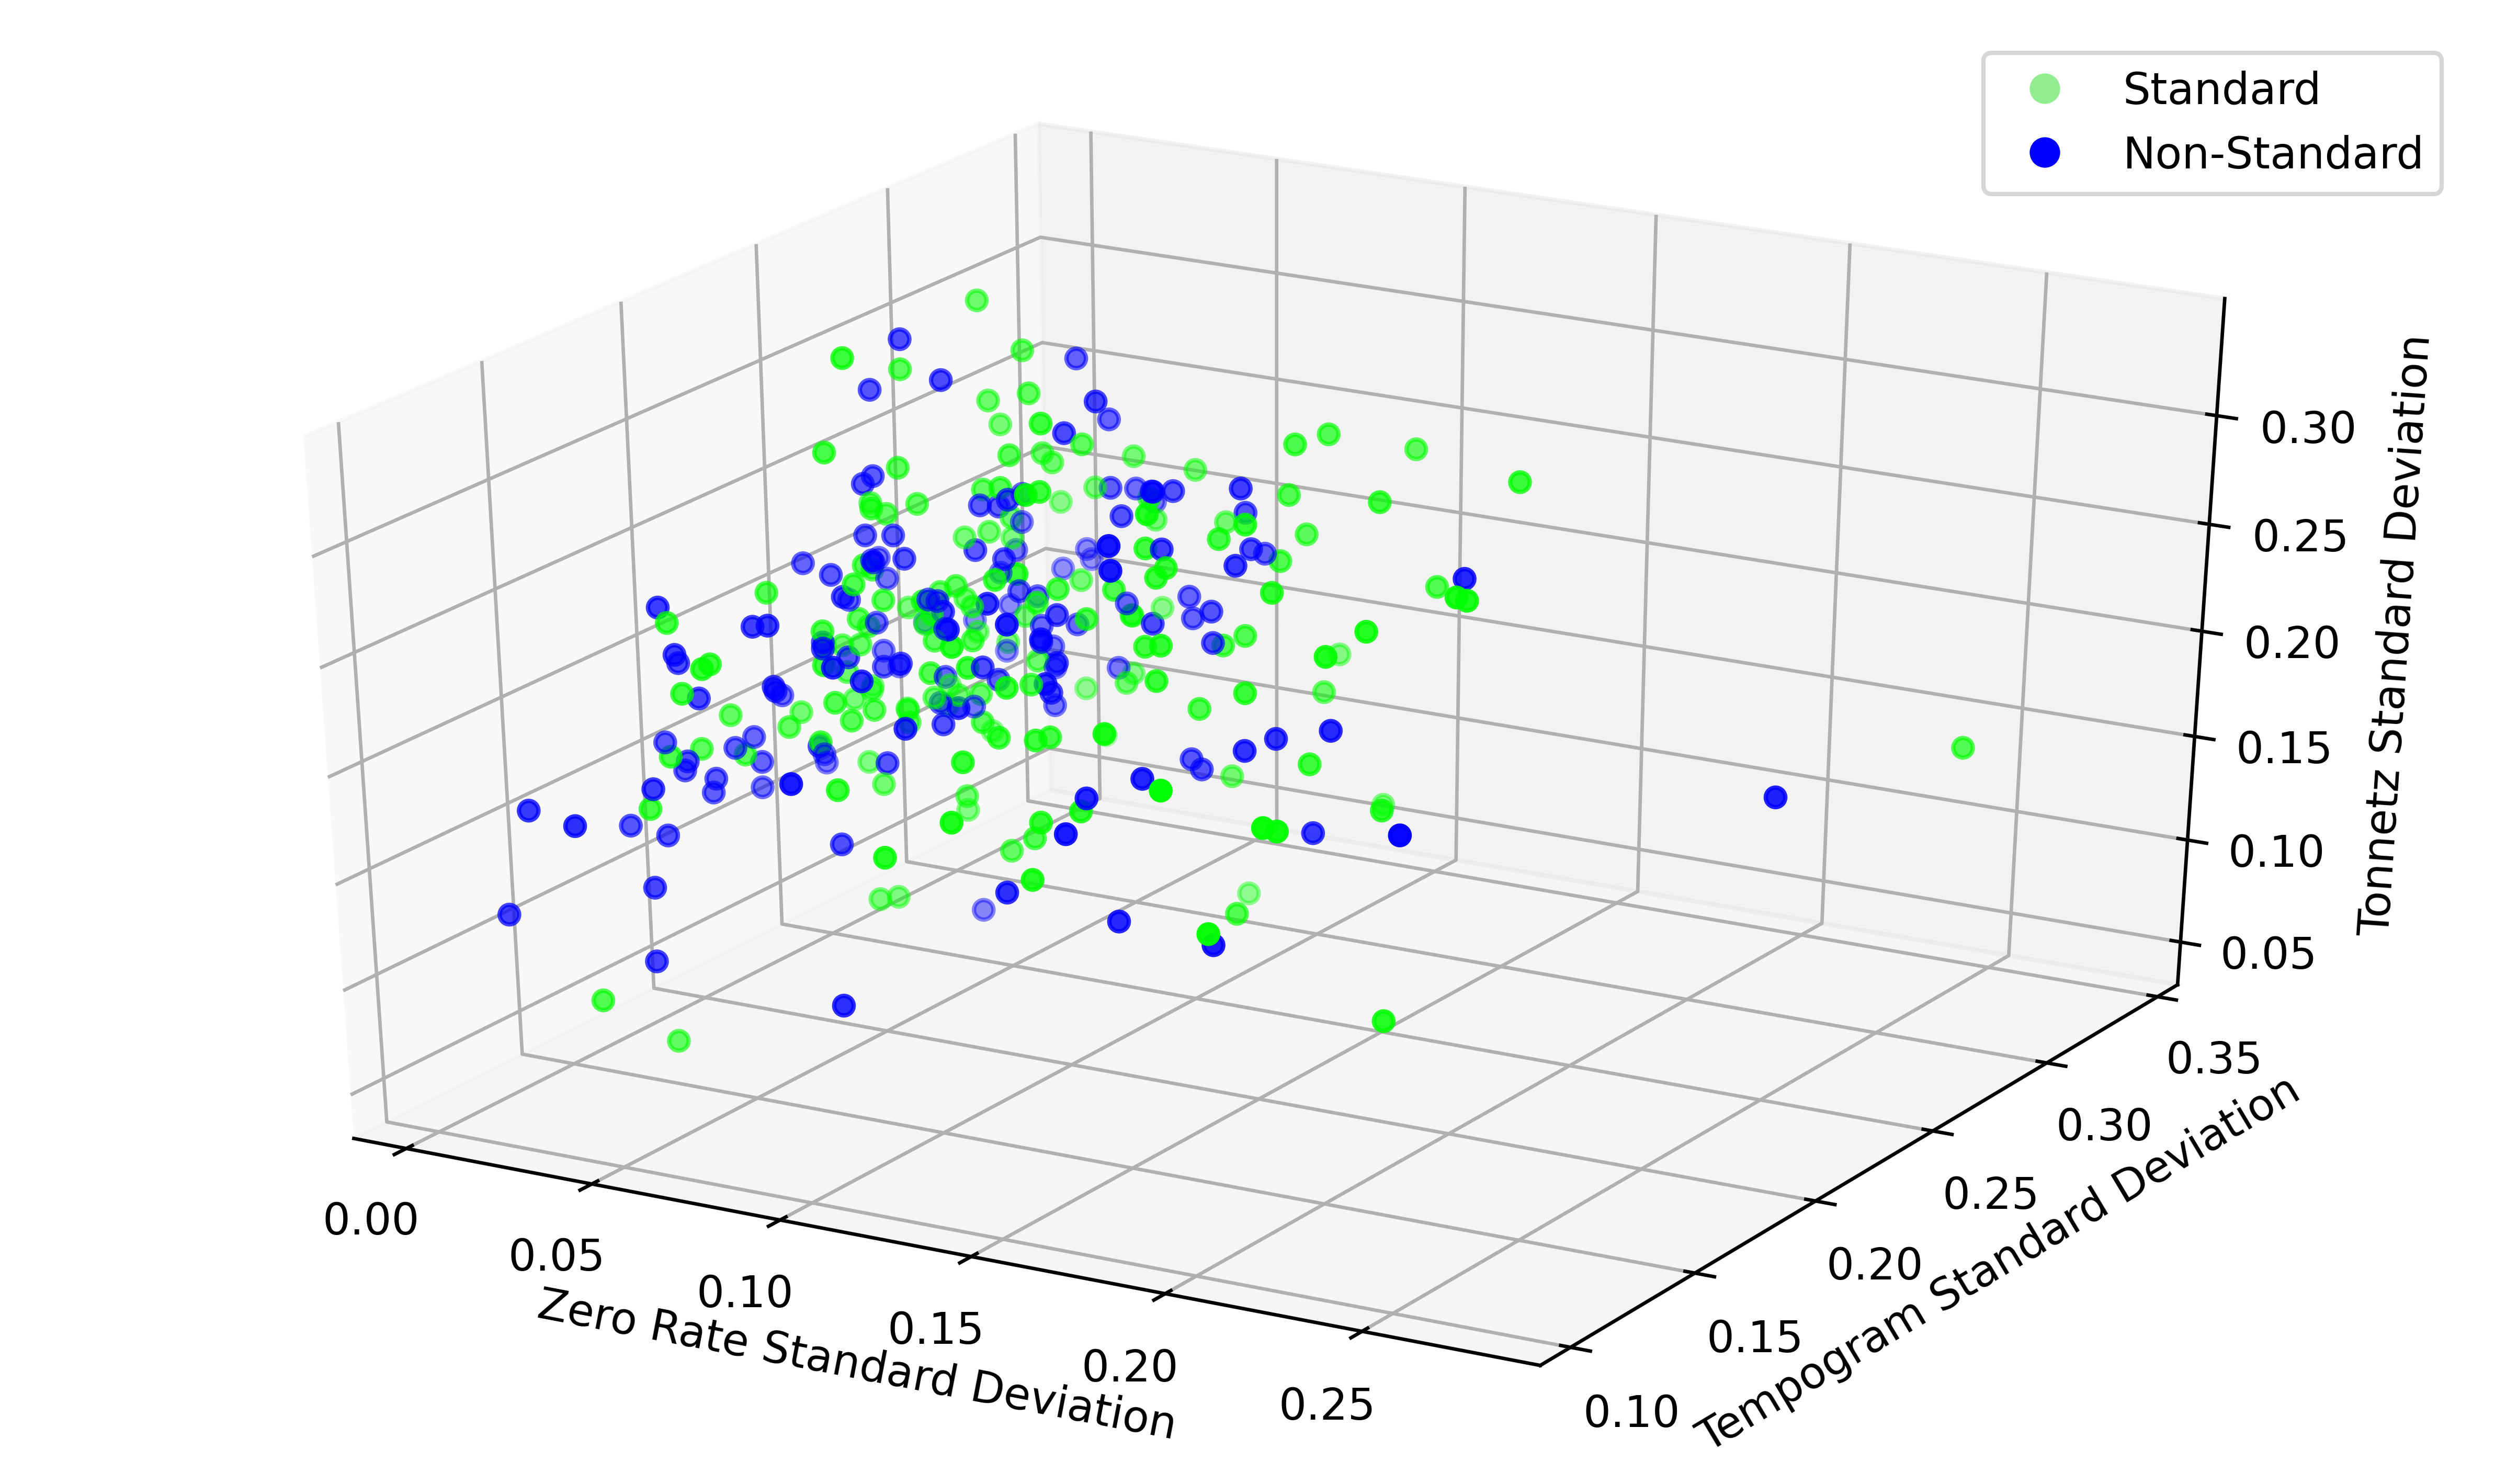

In [20]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=8, label='Potter'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8, label='Wars')]

fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(vis['zero_rate_std'],vis['tempo_std'],vis['ton_std'],c=vis.Standard,cmap='brg',s=20)
ax.set_xlabel('Zero Rate Standard Deviation')
ax.set_ylabel('Tempogram Standard Deviation')
ax.set_zlabel('Tonnetz Standard Deviation')
ax.legend(legend_elements, ['Standard', 'Non-Standard'])
plt.show()

The Figure shows three features of the balanced dataset, as we cannot see more than three dimensions. However lots of the non-standard points are still mixed which may be a problem for classification.


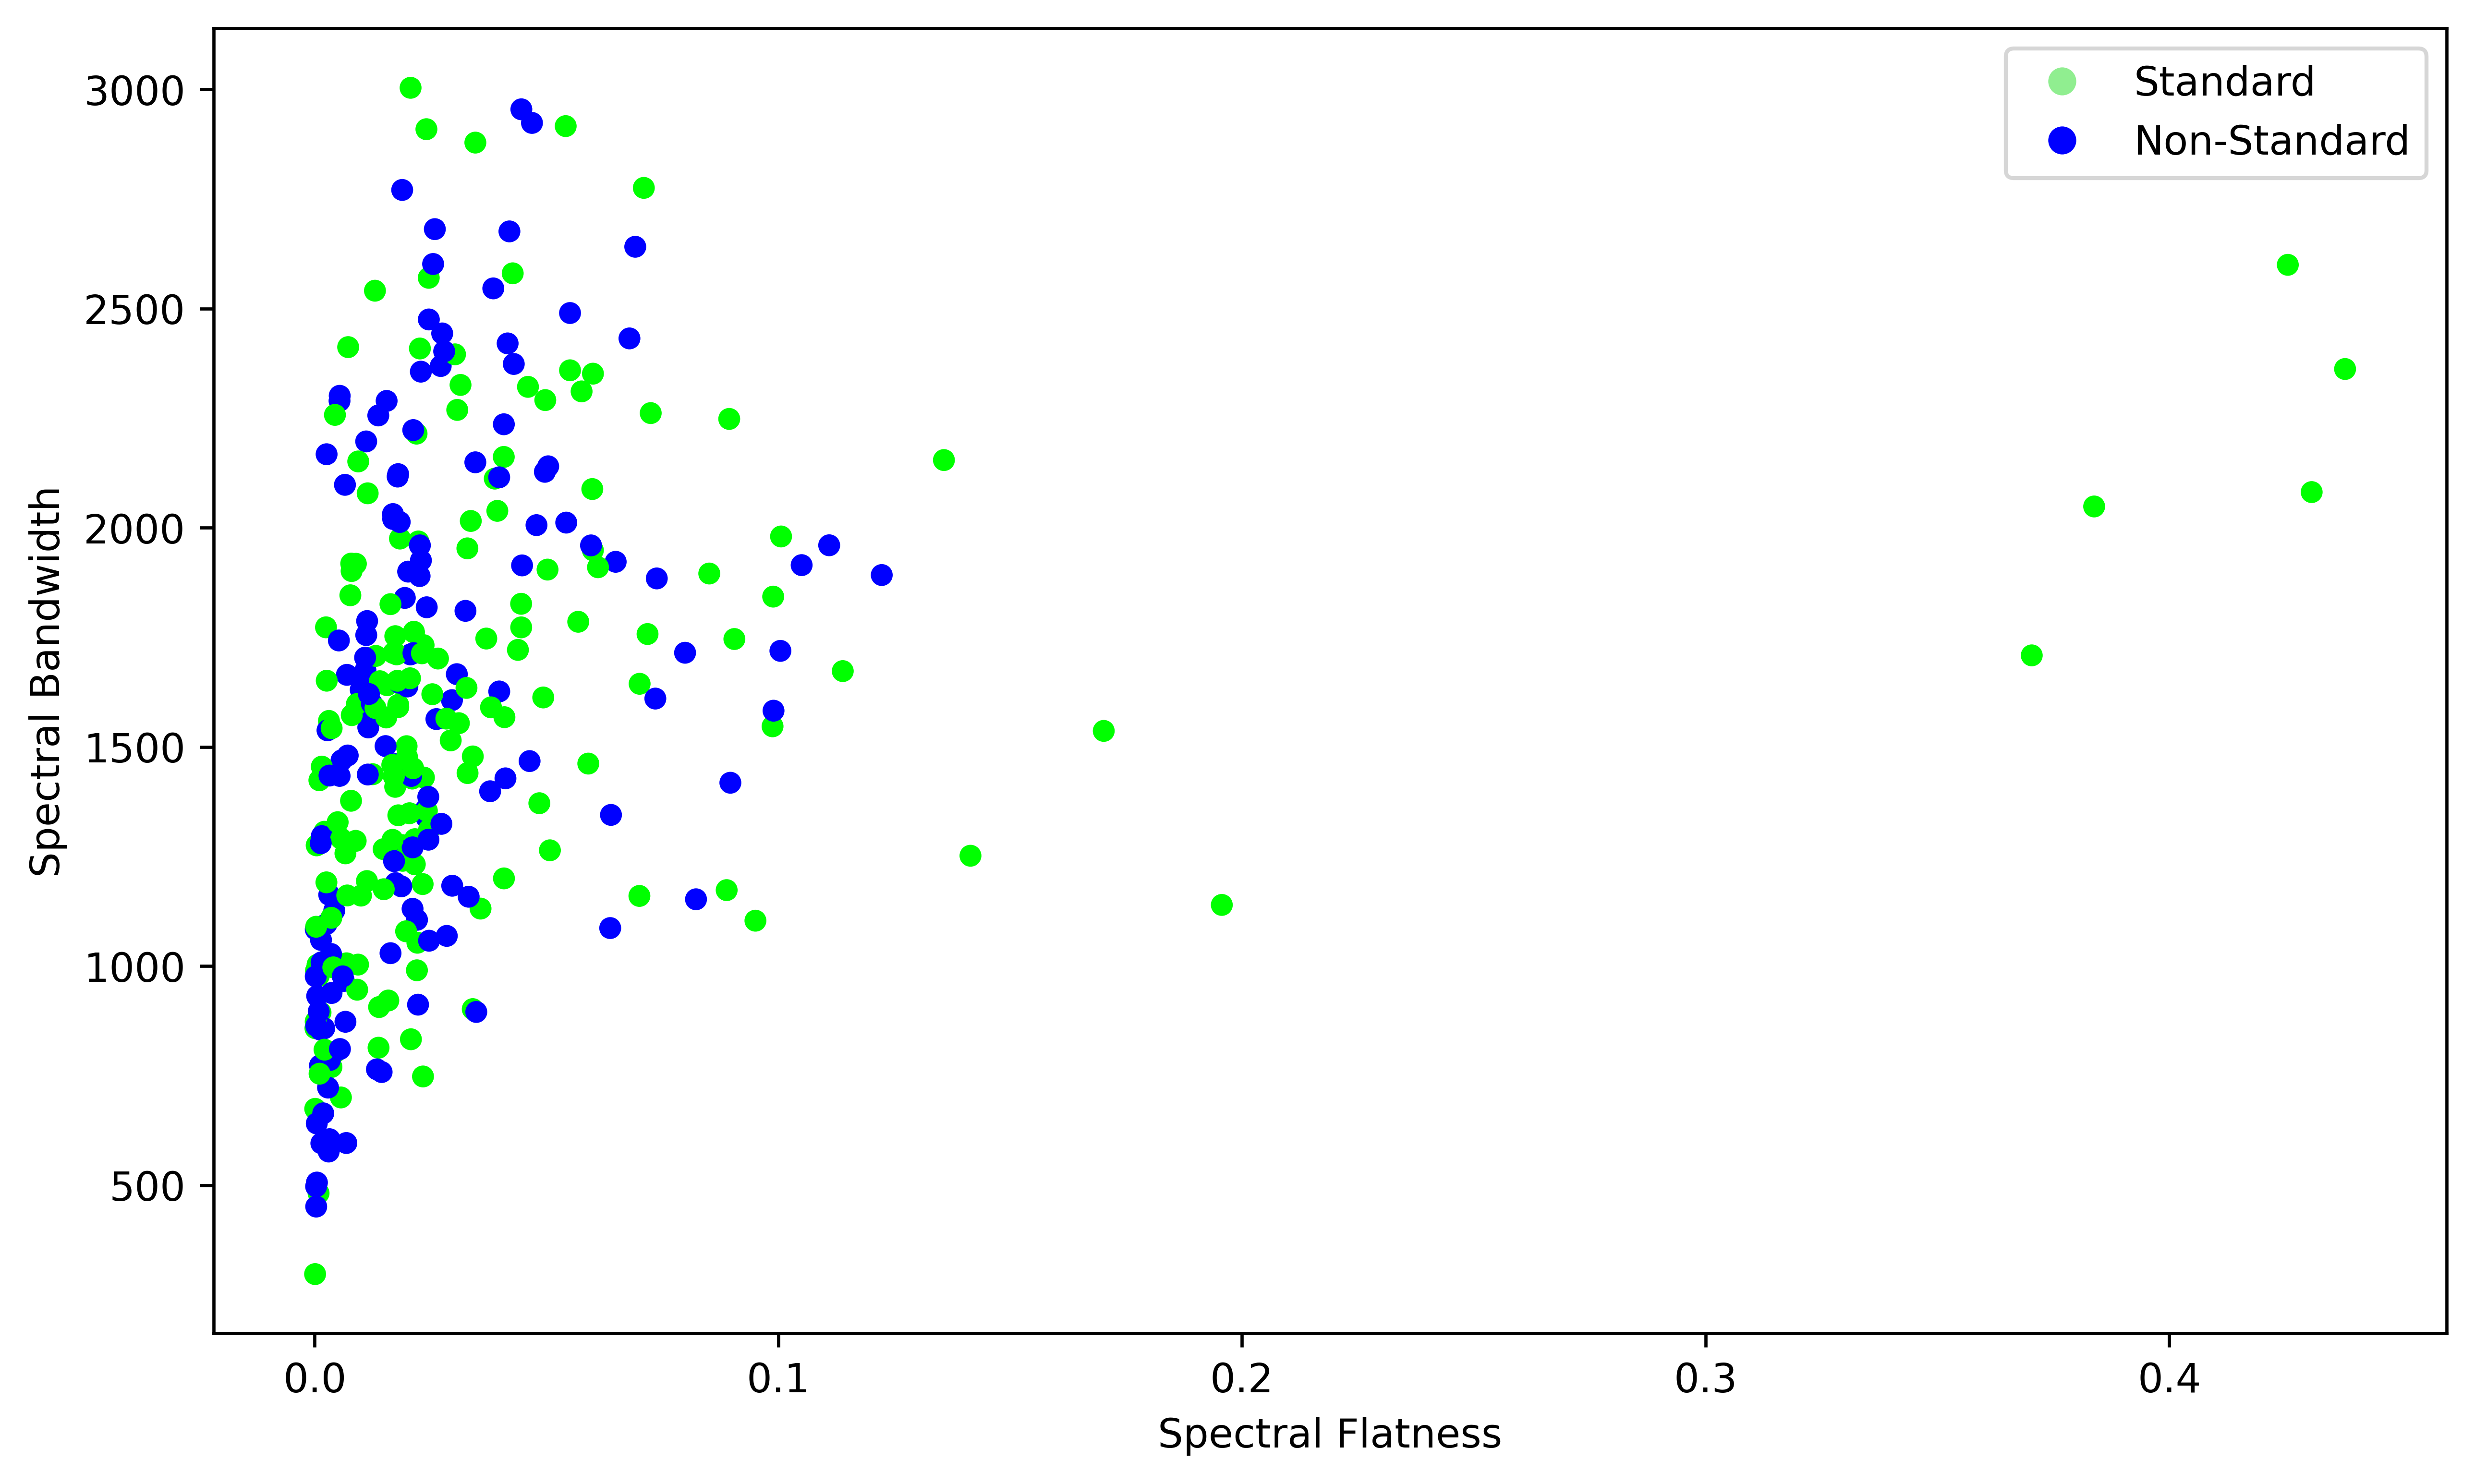

In [21]:
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=8, label='Potter'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8, label='Wars')]

fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.add_subplot(111)
p = ax.scatter(vis['flat_std'],vis['band_std'],c=vis.Standard,cmap='brg',s=20)
ax.set_xlabel('Spectral Flatness')
ax.set_ylabel('Spectral Bandwidth')
ax.legend(legend_elements, ['Standard', 'Non-Standard'])
plt.show()

The Figure shows the other two features. Again, these are mixed which will be difficult for classification.

#### 7.2.2.2 Standard Scaling and Train/Validation Split
The sample is split into training and validation data to allow for model comparison in the next section

In [22]:
def standardise(X):
  mean = X.mean(0)
  sd = X.std(0)
  return (X - mean)/sd

In [23]:
X_train_, X_val_, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state=3)

X_train = standardise(X_train_)  ### normalise after splitting
X_val = standardise(X_val_)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((219, 5), (95, 5), (219,), (95,))

# 8 Results

## 8.1 Validation

### 8.1.1 SVM

In [24]:
scores_array = []

In [25]:
model  = svm.SVC(random_state = 3)

param = {'C': [1,2,4,6,8,10]}
svm_cv = GridSearchCV(model, param, cv=5)
svm_cv.fit(X_train, y_train)
score = svm_cv.score(X_val, y_val)

scores_array.append(['SVM', score])

print('Best hyperparameter setting: {0}.'.format(svm_cv.best_params_))
print('Average training accuracy across folds of best hyperparameter setting: {0}.'.format(svm_cv.best_score_))
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(score))

Best hyperparameter setting: {'C': 1}.
Average training accuracy across folds of best hyperparameter setting: 0.5478858350951373.
Validation dataset accuracy of best hyperparameter setting: 0.5578947368421052.


In [26]:
from sklearn.metrics import confusion_matrix

svm_best = svm.SVC(random_state=3, C=4)
svm_best.fit(X_train, y_train)

y_pred = svm_best.predict(X_val)
df = pd.DataFrame.from_records(confusion_matrix(y_val, y_pred))
print('Confusion matrix SVM:')
display(df)

Confusion matrix SVM:


,0,1
0,21,26
1,17,31


### 8.1.2 KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [2, 5, 9, 13, 15]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train, y_train)
score = knn_cv.score(X_val, y_val)

scores_array.append(['KNN', score])

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_params_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_))
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(score))

Best hyperparameter setting: {'n_neighbors': 9}.
Average accuracy across folds of best hyperparameter setting: 0.5885835095137422.
Validation dataset accuracy of best hyperparameter setting: 0.6105263157894737.


In [28]:
from sklearn.metrics import confusion_matrix

knn_best = KNeighborsClassifier(n_neighbors=9)
knn_best.fit(X_train, y_train)


y_pred = knn_best.predict(X_val)
df = pd.DataFrame.from_records(confusion_matrix(y_val, y_pred))
print('KNN Confusion matrix:')
display(df)

KNN Confusion matrix:


,0,1
0,26,21
1,16,32


### 8.1.3 Logistic Classifier

In [29]:
from sklearn.linear_model import LogisticRegression

parameters = {'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

log = LogisticRegression(random_state=0)
log_cv = GridSearchCV(log, parameters, cv=5)
log_cv.fit(X_train, y_train)
score = log_cv.score(X_val, y_val)

scores_array.append(['Log', score])

print('Best hyperparameter setting: {0}.'.format(log_cv.best_params_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(log_cv.best_score_))
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(score))

Best hyperparameter setting: {'solver': 'liblinear'}.
Average accuracy across folds of best hyperparameter setting: 0.5478858350951374.
Validation dataset accuracy of best hyperparameter setting: 0.5789473684210527.


In [30]:
log_best = LogisticRegression(random_state=0, solver='liblinear')
log_best.fit(X_train, y_train)

y_pred = log_best.predict(X_val)

df = pd.DataFrame.from_records(confusion_matrix(y_val, y_pred))
print('Log Confusion matrix:')
display(df)

Log Confusion matrix:


,0,1
0,17,30
1,10,38


### 8.1.4 Random Forest

In [31]:
from sklearn import ensemble

parameters = {'criterion' : ['gini', 'entropy']}

forest = ensemble.RandomForestClassifier(n_estimators=100, random_state=0)
forest_cv = GridSearchCV(forest, parameters, cv=5)
forest_cv.fit(X_train, y_train)
score = forest_cv.score(X_val, y_val)

scores_array.append(['Random Forest', score])

print('Best hyperparameter setting: {0}.'.format(forest_cv.best_params_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(forest_cv.best_score_))
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(score))

Best hyperparameter setting: {'criterion': 'gini'}.
Average accuracy across folds of best hyperparameter setting: 0.5657505285412262.
Validation dataset accuracy of best hyperparameter setting: 0.5789473684210527.


In [32]:
forest_best =  ensemble.RandomForestClassifier(random_state=0, criterion='entropy')
forest_best.fit(X_train, y_train)

y_pred = forest_best.predict(X_val)

df = pd.DataFrame.from_records(confusion_matrix(y_val, y_pred))
print('Forest Confusion matrix:')
display(df)

Forest Confusion matrix:


,0,1
0,21,26
1,16,32


### 8.1.5 Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

bay  = GaussianNB()
bay.fit(X_train, y_train)

y_pred = bay.predict(X_val)
score = bay.score(X_val, y_val)

scores_array.append(['Bayes', score])

df = pd.DataFrame.from_records(confusion_matrix(y_val, y_pred))
print('Bayes Confusion matrix:')
display(df)

print('Validation dataset accuracy: {0}.'.format(score))

Bayes Confusion matrix:


,0,1
0,42,5
1,34,14


Validation dataset accuracy: 0.5894736842105263.


### 8.1.6 Model Comparison

Text(0.5, 0, 'Model')

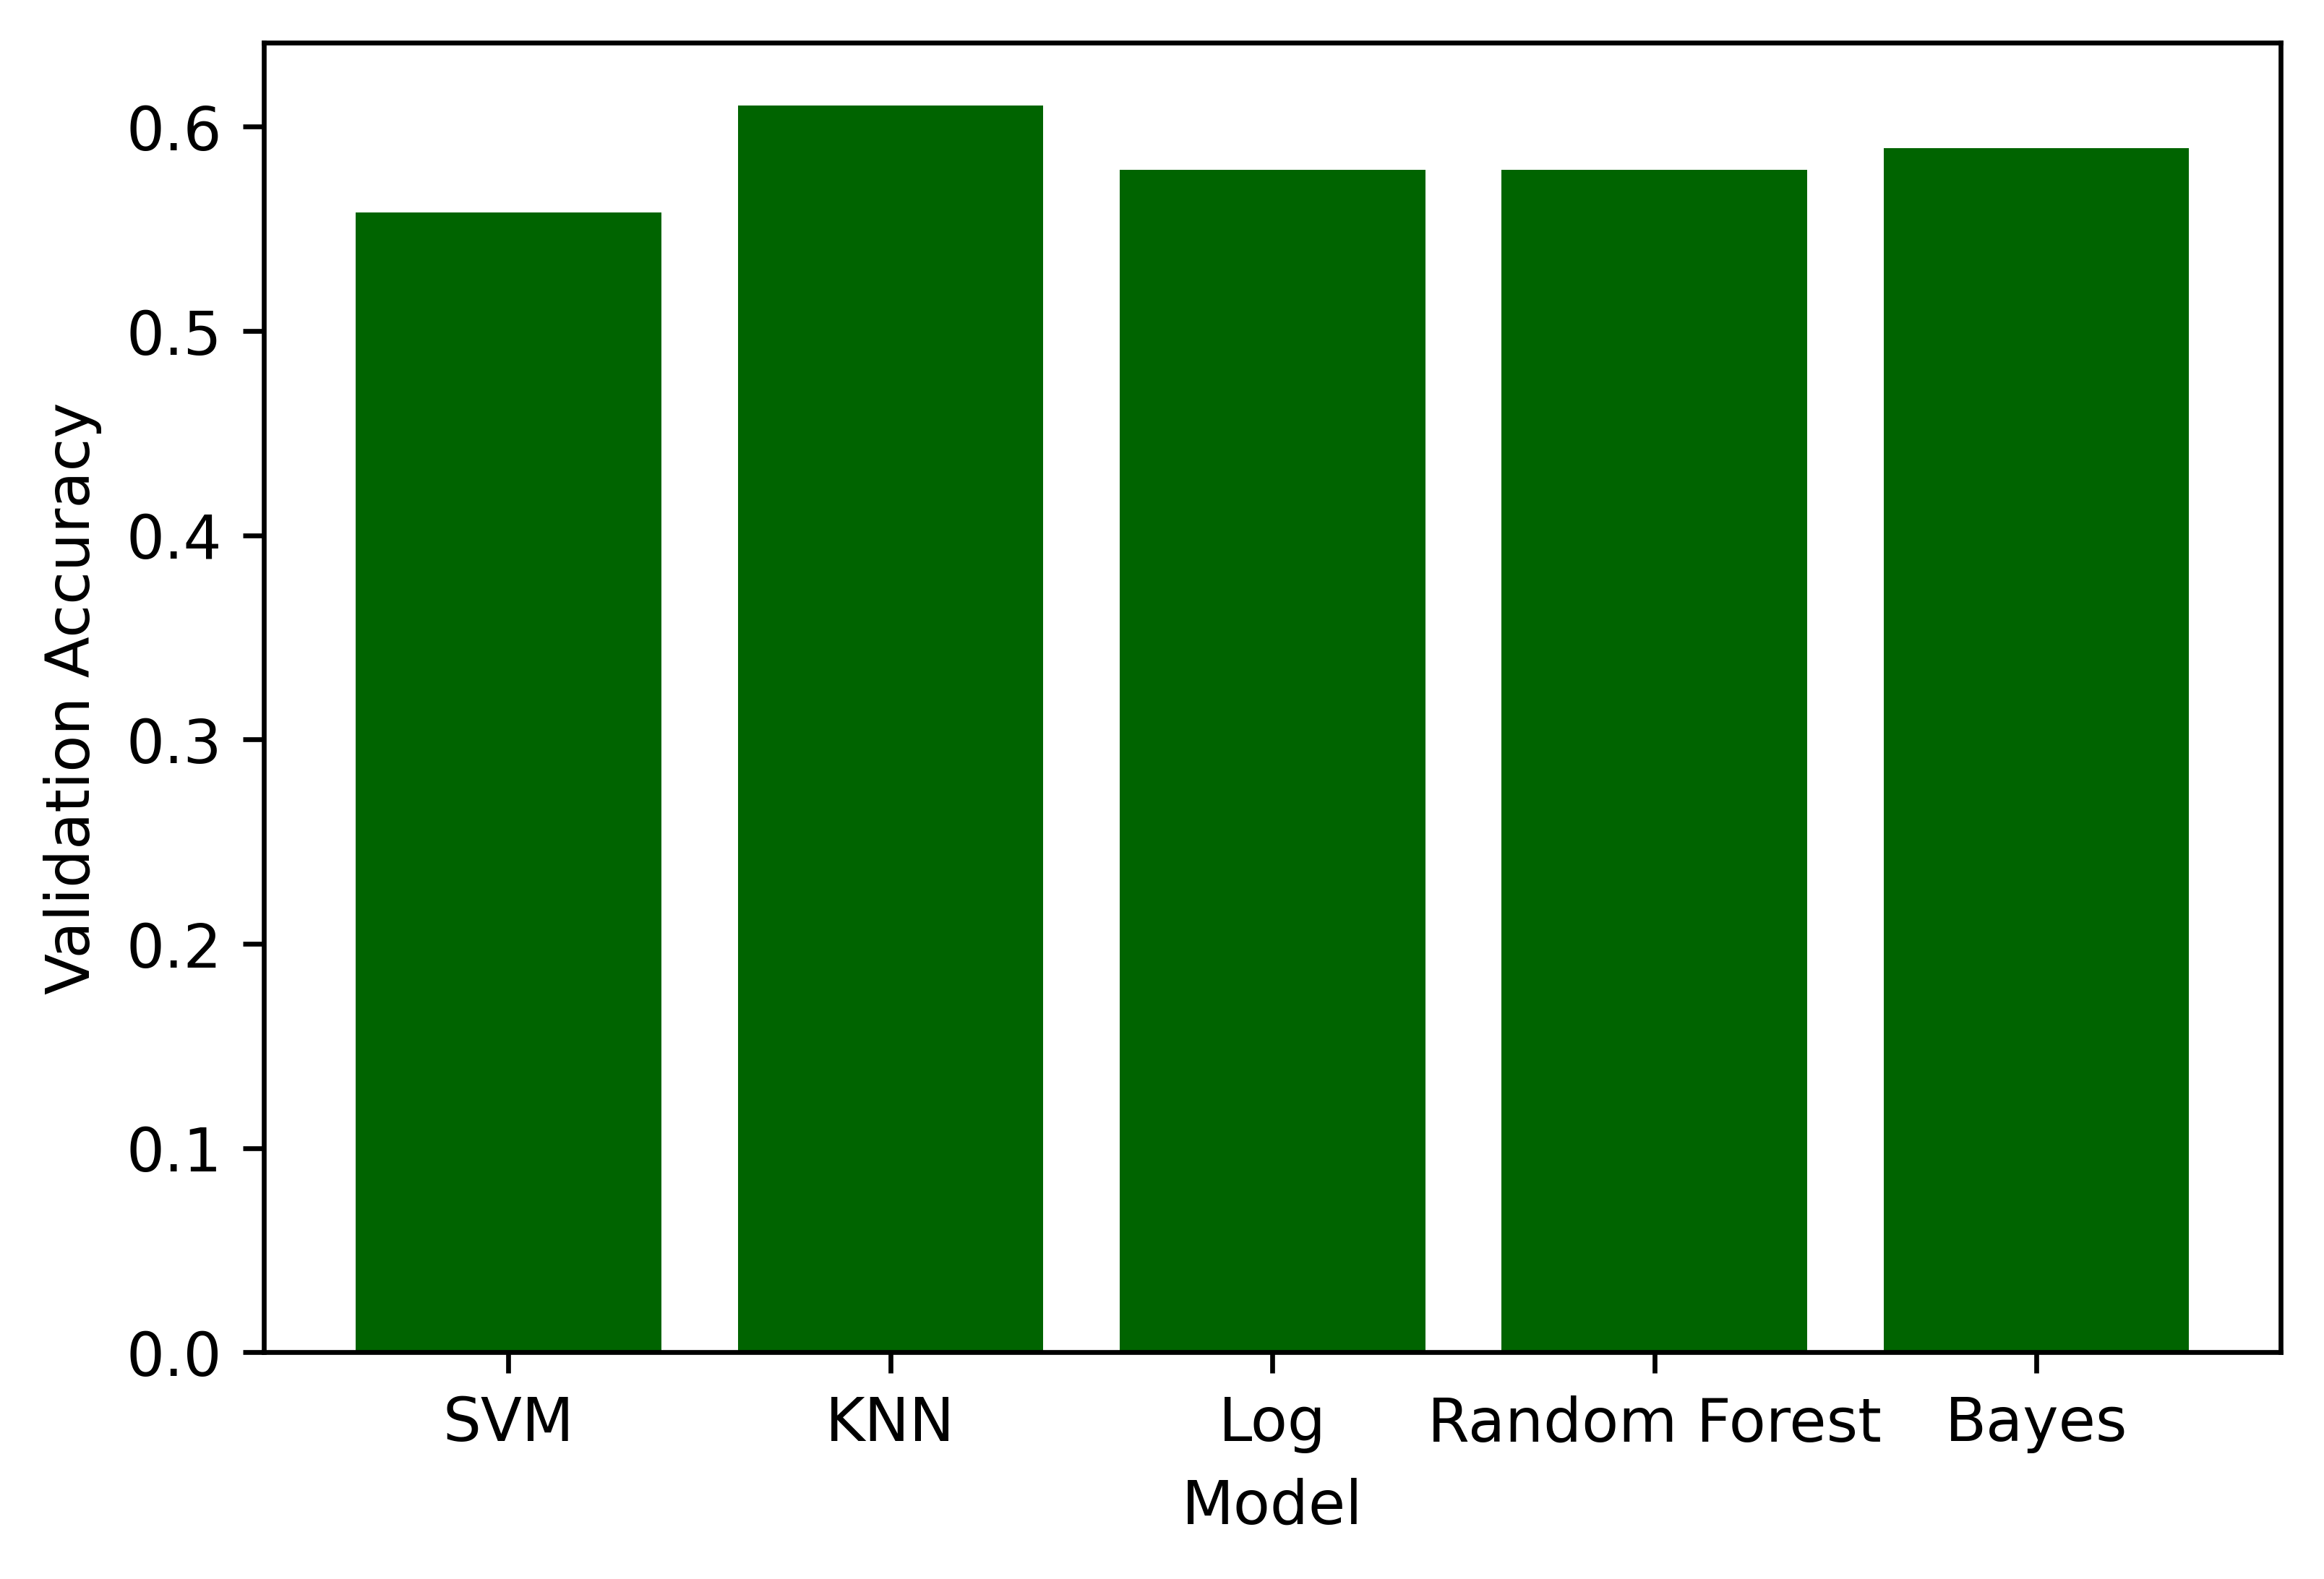

In [34]:
scores_df = pd.DataFrame(scores_array, columns = ['Model', 'Validation Accuracy'])

fig, (a1) = plt.subplots(1,1, dpi=600)

a1.bar(scores_df.Model, scores_df.loc[:,'Validation Accuracy'], color='darkgreen')
a1.set_ylabel('Validation Accuracy')
a1.set_xlabel('Model')

From the various confusion matrices, it can be seen that all classifiers are very confused by misclassifying actual and predicted songs. All accuracies being close to 0.5 means that all models are terrible classifiers for this problem. This is despite choosing the optimum parameters. Nonetheless, the highest accuracy is produced from the KNN model.

## 8.2 Training

### 8.2.1 Whole Dataset Preparation
We will now train the chosen model on the whole balanced dataset.

In [35]:
balanced = balanced.reset_index(drop=True)

In [36]:
X,y = getXy(balanced, labels_file=balanced, scale_audio=True, onlySingleDigit=True)

3%
Estimated time left: 3495 seconds
7%
Estimated time left: 3232 seconds
11%
Estimated time left: 3152 seconds
15%
Estimated time left: 2949 seconds
19%
Estimated time left: 2772 seconds
23%
Estimated time left: 2596 seconds
27%
Estimated time left: 2465 seconds
31%
Estimated time left: 2303 seconds
35%
Estimated time left: 2177 seconds
39%
Estimated time left: 2030 seconds
43%
Estimated time left: 1892 seconds
47%
Estimated time left: 1753 seconds
51%
Estimated time left: 1623 seconds
55%
Estimated time left: 1489 seconds
59%
Estimated time left: 1360 seconds
63%
Estimated time left: 1227 seconds
67%
Estimated time left: 1094 seconds
71%
Estimated time left: 964 seconds
75%
Estimated time left: 833 seconds
79%
Estimated time left: 699 seconds
83%
Estimated time left: 568 seconds
86%
Estimated time left: 435 seconds
90%
Estimated time left: 303 seconds
94%
Estimated time left: 171 seconds
98%
Estimated time left: 38 seconds
Done!


In [37]:
X_train_, X_val_, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state=3)

X_train = standardise(X_train_)  ### normalise after splitting
X_val = standardise(X_val_)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1097, 5), (471, 5), (1097,), (471,))

The dataset is split into train and test subsets for performance verification.

### 8.2.2 Model Training

Best hyperparameter setting: {'n_neighbors': 13}.
Average accuracy across folds of best hyperparameter setting: 0.6008417508417507.
Validation dataset accuracy of best hyperparameter setting: 0.6157112526539278.
KNN Confusion matrix:


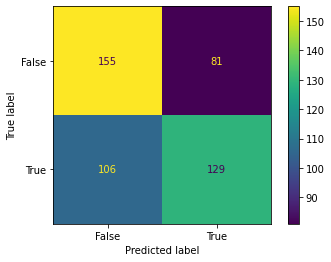

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

parameters = {'n_neighbors': [2, 5, 9, 13, 15]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=20)
knn_cv.fit(X_train, y_train)
score = knn_cv.score(X_val, y_val)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_params_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_))
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(score))

knn_best = KNeighborsClassifier(n_neighbors=9)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_val)
print('KNN Confusion matrix:')
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

In [39]:
from sklearn import metrics

print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.59      0.66      0.62       236
        True       0.61      0.55      0.58       235

    accuracy                           0.60       471
   macro avg       0.60      0.60      0.60       471
weighted avg       0.60      0.60      0.60       471



We can see that training a KNN classifier with a larger dataset has produced a better validation accuracy. The confusion matrix also shows that the classifier is still confused. The actual classes in the rows and the predicted in the columns show that the classifier is more likely to classify Non-Standard (False) correctly than Standard (True) Correctly. Nonetheless, the classifier is more likely to classify correctly than incorrectly in both classes.
Yet, an accuracy of 0.6 is still poor.

# 9 Conclusions

In conclusion, it is not reliable to use the classifier for the machine learning problem.
It is possible that there is no link between incorrect naming and incorrect recording, but this is unlikely. Future work on extraction of a more identifiable feature may allow for better modeling, in addition to quality checking of recordings. After all, rubbish in is rubbish out.